# Defining the problem statement
Based on the predictors, we need to predict the price of a used car based upon feature.

## Determining  type of machine learning algorithms used 
the target variable is continuous. So this is Supervised Machine Learning Regression Predictive Model.
linear regression
polynominal regression


# 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# 2. Loading dataset

In [2]:
dataFile = pd.read_csv('CarPrice_main_dataset.csv')
dataFile.head()

,S.No#,CarTitle,CarCompany,ModelYear,Mileage(km),EngineType,Transmission,RegisteredCIty,CarColor,EngineCapacity(cc),BodyType,Price(PKR_lacs)
0,1,Suzuki Bolan VX 2010,Suzuki,2010,60000,Petrol,Manual,Lahore,Maroon,800,Mini Van,6.45
1,2,Suzuki Alto VXR 2006,Suzuki,2006,54000,Petrol,Manual,Islamabad,White,1000,Hatchback,6.45
2,3,Suzuki Cultus VXR 2006,Suzuki,2006,50000,Petrol,Manual,Lahore,Silver,1000,Hatchback,6.45
3,4,Suzuki Mehran VX (CNG) 2012,Suzuki,2012,59000,Petrol,Manual,Lahore,Black,800,Hatchback,6.45
4,5,Suzuki Mehran VX 2011,Suzuki,2011,45000,Petrol,Manual,Sindh,White,800,Hatchback,6.50


# 3. Understanding data in csv file

## 3.1 Data description in csv file


The meaning of each column in the data is as below:

1. S.No. : Serial Number
2. carTitle : Name of the car which including carcompany name and Modeldetail and modelyear 
3. ModelYear : Manufacturing year of the car
4. Mileage(km): is the Kilometers_driven by the car, The total kilometers driven in the car by the previous owner(s) in KM.
5. EngineType:the type of fuel used by the car. (Petrol, Diesel, hybrid)
6. Transmission: The type of transmission used by the car. (Automatic / Manual)
7. RegisteredCIty: The location in which the car is register city	
8. CarColor: the colour of the car
9. EngineCapacity(cc): The displacement volume of the engine in CC.
10. BodyType:	
11. Price(PKR_lacs): The price of the used car in PKR Lakhs (1 Lakh = 100, 000)

## 3.2 Peek at the data head, tail and columns

In [3]:
dataFile.head()

,S.No#,CarTitle,CarCompany,ModelYear,Mileage(km),EngineType,Transmission,RegisteredCIty,CarColor,EngineCapacity(cc),BodyType,Price(PKR_lacs)
0,1,Suzuki Bolan VX 2010,Suzuki,2010,60000,Petrol,Manual,Lahore,Maroon,800,Mini Van,6.45
1,2,Suzuki Alto VXR 2006,Suzuki,2006,54000,Petrol,Manual,Islamabad,White,1000,Hatchback,6.45
2,3,Suzuki Cultus VXR 2006,Suzuki,2006,50000,Petrol,Manual,Lahore,Silver,1000,Hatchback,6.45
3,4,Suzuki Mehran VX (CNG) 2012,Suzuki,2012,59000,Petrol,Manual,Lahore,Black,800,Hatchback,6.45
4,5,Suzuki Mehran VX 2011,Suzuki,2011,45000,Petrol,Manual,Sindh,White,800,Hatchback,6.50


In [4]:
dataFile.tail()

,S.No#,CarTitle,CarCompany,ModelYear,Mileage(km),EngineType,Transmission,RegisteredCIty,CarColor,EngineCapacity(cc),BodyType,Price(PKR_lacs)
11708,11709,Mercedes Benz C Class C63 AMG 2010,Mercedes,2010,40000,Petrol,Automatic,Karachi,White,6200,Coupe,150.0
11709,11710,Toyota Land Cruiser 79 Series 30th Anniversary...,Toyota,2015,40000,Petrol,Manual,Sindh,Gold,4000,SUV,150.0
11710,11711,Toyota Fortuner 2.8 Sigma 4 2021,Toyota,2021,18000,Diesel,Automatic,Islamabad,White,2800,SUV,150.0
11711,11712,Toyota Fortuner 2.8 Sigma 4 2022,Toyota,2022,3500,Petrol,Automatic,Un-Registered,White,2800,SUV,150.0
11712,11713,Toyota Prado TX L Package 2.7 2012,Toyota,2012,48000,Petrol,Automatic,Sindh,Black,2700,SUV,150.0


In [5]:
attribute_col= dataFile.columns
print(attribute_col)


Index(['S.No#', 'CarTitle', 'CarCompany', 'ModelYear', 'Mileage(km)',
       'EngineType', 'Transmission', 'RegisteredCIty', 'CarColor',
       'EngineCapacity(cc)', 'BodyType', 'Price(PKR_lacs)'],
      dtype='object')


## 3.3 Dimensions of the data

In [6]:
print ("dimnsion of the data ",dataFile.shape)

dimnsion of the data  (11713, 12)


## 3.4 Data type for each attribute

In [7]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11713 entries, 0 to 11712
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.No#               11713 non-null  int64  
 1   CarTitle            11713 non-null  object 
 2   CarCompany          11713 non-null  object 
 3   ModelYear           11713 non-null  int64  
 4   Mileage(km)         11713 non-null  int64  
 5   EngineType          11713 non-null  object 
 6   Transmission        11713 non-null  object 
 7   RegisteredCIty      11713 non-null  object 
 8   CarColor            11713 non-null  object 
 9   EngineCapacity(cc)  11713 non-null  int64  
 10  BodyType            11713 non-null  object 
 11  Price(PKR_lacs)     11713 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


## 3.5 feature unique value count and description

In [8]:
attUniqValue=dataFile.nunique()
print(attUniqValue)

Continuous_features =[ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']

print("-------------Categorical_features unique value--------------------")
for Cate_features in Categorical_features:
    print(Cate_features, "attribute has",attUniqValue[Cate_features],"are : ", dataFile[Cate_features].unique(),"\n")

S.No#                 11713
CarTitle               1709
CarCompany               38
ModelYear                38
Mileage(km)            1639
EngineType                3
Transmission              2
RegisteredCIty           55
CarColor                 20
EngineCapacity(cc)       48
BodyType                 19
Price(PKR_lacs)        1309
dtype: int64
-------------Categorical_features unique value--------------------
CarCompany attribute has 38 are :  ['Suzuki' 'Daihatsu' 'Hyundai' 'Honda' 'Chevrolet' 'Toyota' 'FAW' 'Prince'
 'Mitsubishi' 'United' 'Nissan' 'Subaru' 'Isuzu' 'KIA' 'Mercedes' 'Jeep'
 'Daehan' 'Mazda' 'Changan' 'Master' 'SsangYong' 'Proton' 'Land' 'JAC'
 'MG' 'DFSK' 'Audi' 'Peugeot' 'Chery' 'Lexus' 'BMW' 'Volkswagen' 'Haval'
 'BAIC' 'Porsche' 'Adam' 'Range' 'Ford'] 

EngineType attribute has 3 are :  ['Petrol' 'Diesel' 'Hybrid'] 

Transmission attribute has 2 are :  ['Manual' 'Automatic'] 

RegisteredCIty attribute has 55 are :  ['Lahore' 'Islamabad' 'Sindh' 'Abbottabad' 'Sheik

## 3.6 Checking for null values


In [9]:

dataFile.isnull().sum()

S.No#                 0
CarTitle              0
CarCompany            0
ModelYear             0
Mileage(km)           0
EngineType            0
Transmission          0
RegisteredCIty        0
CarColor              0
EngineCapacity(cc)    0
BodyType              0
Price(PKR_lacs)       0
dtype: int64

## 3.7 Identify and delete Rows that Contain Duplicate Data


In [10]:
duplicate_rows = dataFile.duplicated()
print(duplicate_rows.any())
dataFile.drop_duplicates(inplace = True)
print(dataFile.shape)

False
(11713, 12)


# 4 Exploratory data analysis (EDA)

## 4.1 Descriptive Statistics of all continous vatiable

In [11]:
dataFile.describe() # statistical description of numberical attributes

,S.No#,ModelYear,Mileage(km),EngineCapacity(cc),Price(PKR_lacs)
count,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000
mean,5857.000000,2019.065312,24334.524033,1525.587979,48.596530
std,3381.396186,4.318666,18085.145781,634.555560,28.667402
min,1.000000,1985.000000,304.000000,600.000000,6.450000
25%,2929.000000,2018.000000,8200.000000,1000.000000,22.750000
50%,5857.000000,2021.000000,21000.000000,1500.000000,49.000000
75%,8785.000000,2021.000000,40000.000000,1800.000000,63.500000
max,11713.000000,2022.000000,60000.000000,6200.000000,150.000000


## 4.2 Understanding "Price(PKR_lacs)" target continous variable

In [12]:
diffCarPrice=dataFile['Price(PKR_lacs)'].nunique()
print(diffCarPrice)

1309


In [13]:
dataFile['Price(PKR_lacs)'].value_counts(ascending=True)

Price(PKR_lacs)
96.99      1
51.20      1
51.40      1
90.75      1
90.95      1
        ... 
56.00    135
60.00    136
50.00    140
65.00    154
55.00    179
Name: count, Length: 1309, dtype: int64

In [14]:
dataFile['Price(PKR_lacs)'].value_counts().sort_index(ascending=True)


Price(PKR_lacs)
6.45       4
6.50      14
6.55       3
6.60      10
6.65       1
          ..
146.00     2
147.00     2
148.00     5
149.00     2
150.00    15
Name: count, Length: 1309, dtype: int64

count    11713.000000
mean        48.596530
std         28.667402
min          6.450000
25%         22.750000
50%         49.000000
75%         63.500000
max        150.000000
Name: Price(PKR_lacs), dtype: float64
Price(PKR_lacs) Skewness: 0.8065567116693436
Price(PKR_lacs) kurtosis: 0.6555074400883862


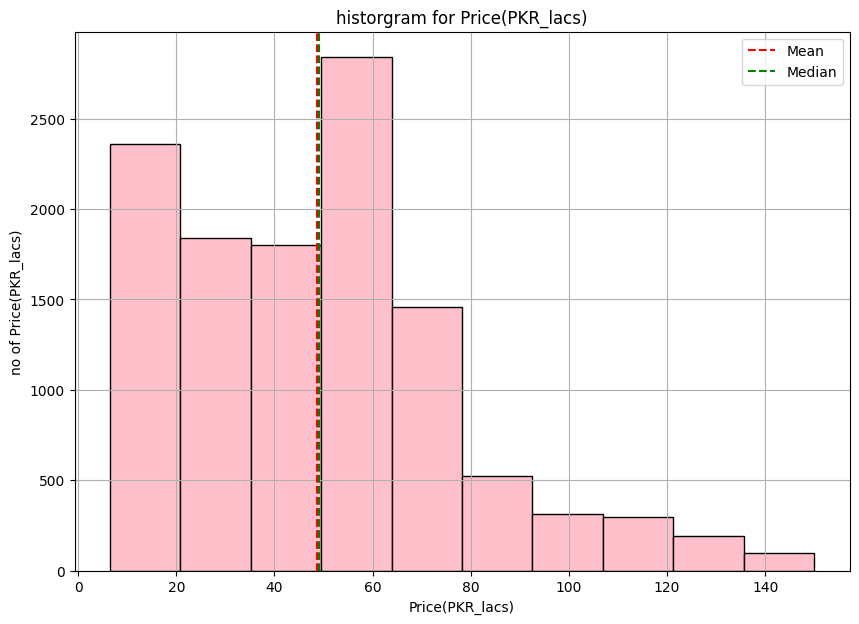

In [15]:
dataFile['Price(PKR_lacs)'].hist(figsize = (10, 7), color = 'pink', edgecolor = 'black' )
plt.axvline(x=dataFile['Price(PKR_lacs)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=dataFile['Price(PKR_lacs)'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.xlabel("Price(PKR_lacs)")
plt.ylabel("no of Price(PKR_lacs)")
plt.title("historgram for Price(PKR_lacs)")
print(dataFile['Price(PKR_lacs)'].describe()) # statistical description of numberical attributes
print( 'Price(PKR_lacs) Skewness:', dataFile['Price(PKR_lacs)'].skew())
print( 'Price(PKR_lacs) kurtosis:', dataFile['Price(PKR_lacs)'].kurtosis())

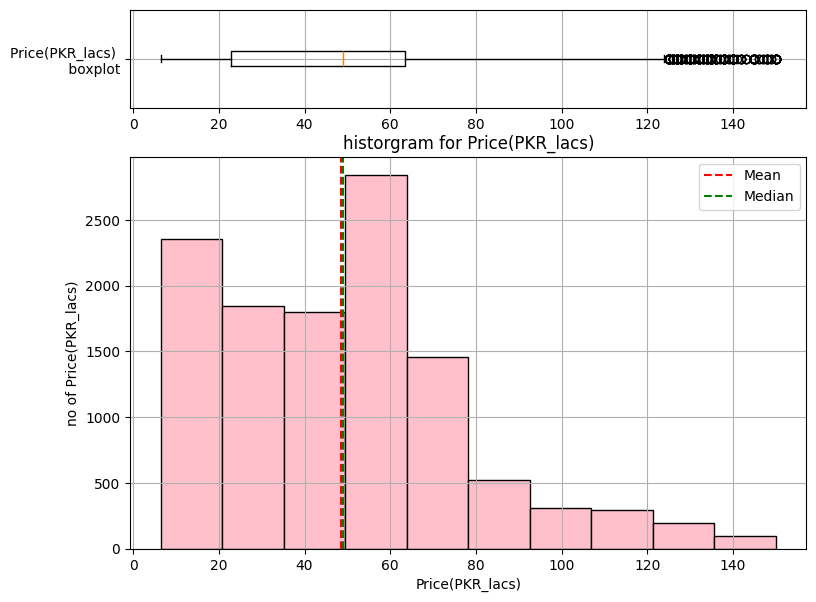

In [16]:
fig, ((ax11,ax12),(ax21,ax22)) = plt.subplots (2,2, sharex=False,sharey=False, gridspec_kw={"height_ratios": (.2, .8),"width_ratios": (.2, .8)},figsize=(12, 7))
ax11.remove()
ax21.remove()
ax12.boxplot(dataFile['Price(PKR_lacs)'],labels=["Price(PKR_lacs) \n boxplot"],vert=0)
ax22.hist(dataFile['Price(PKR_lacs)'], color = 'pink', edgecolor = 'black' )
plt.axvline(x=dataFile['Price(PKR_lacs)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=dataFile['Price(PKR_lacs)'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.xlabel("Price(PKR_lacs)")
plt.ylabel("no of Price(PKR_lacs)")
plt.title("historgram for Price(PKR_lacs)")
ax12.yaxis.grid(True)
ax12.xaxis.grid(True)
ax22.yaxis.grid(True)
ax22.xaxis.grid(True)
plt.show()

## 4.3 Understanding "ModelYear" continous variable

In [17]:
print(dataFile['ModelYear'].nunique())


38


In [18]:
dataFile['ModelYear'].value_counts(ascending=True)

ModelYear
1987       1
1985       2
1988       3
1986       4
1991       4
1990       6
1993       6
1989       6
1992       6
1997       8
1999       8
1994       8
1996      12
2001      13
2000      13
1998      15
2002      16
1995      17
2004      34
2003      35
2009      46
2005      50
2010      66
2011      76
2012      76
2008      77
2007      82
2006      83
2013     120
2014     144
2015     245
2016     320
2017     581
2018     860
2019    1123
2020    1319
2022    2663
2021    3565
Name: count, dtype: int64

In [19]:
dataFile['ModelYear'].value_counts().sort_index(ascending=True)


ModelYear
1985       2
1986       4
1987       1
1988       3
1989       6
1990       6
1991       4
1992       6
1993       6
1994       8
1995      17
1996      12
1997       8
1998      15
1999       8
2000      13
2001      13
2002      16
2003      35
2004      34
2005      50
2006      83
2007      82
2008      77
2009      46
2010      66
2011      76
2012      76
2013     120
2014     144
2015     245
2016     320
2017     581
2018     860
2019    1123
2020    1319
2021    3565
2022    2663
Name: count, dtype: int64

count    11713.000000
mean      2019.065312
std          4.318666
min       1985.000000
25%       2018.000000
50%       2021.000000
75%       2021.000000
max       2022.000000
Name: ModelYear, dtype: float64
ModelYear skew -3.178150242744591
ModelYear kurtosis 13.019607099279234


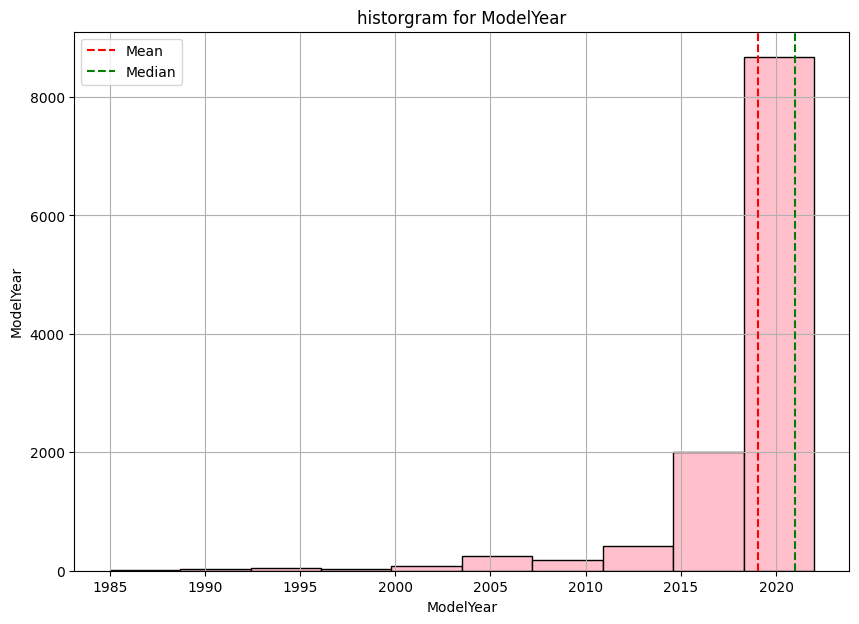

In [20]:
dataFile['ModelYear'].hist(figsize = (10, 7), color = 'pink', edgecolor = 'black' )
plt.axvline(x=dataFile['ModelYear'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=dataFile['ModelYear'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.xlabel("ModelYear")
plt.ylabel("ModelYear")
plt.title("historgram for ModelYear")
print(dataFile['ModelYear'].describe()) # statistical description of numberical attributes
print( 'ModelYear skew', dataFile['ModelYear'].skew())
print( 'ModelYear kurtosis', dataFile['ModelYear'].kurtosis())

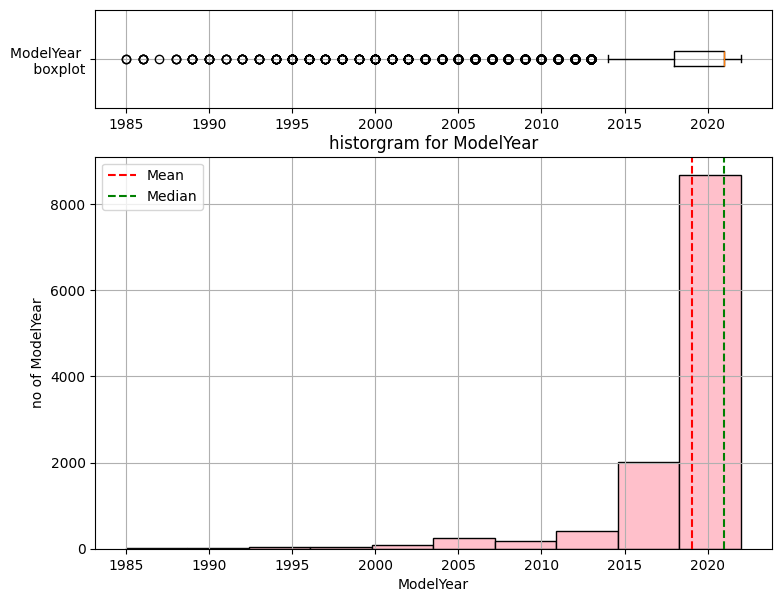

In [21]:
fig, ((ax11,ax12),(ax21,ax22)) = plt.subplots (2,2, sharex=False,sharey=False, gridspec_kw={"height_ratios": (.2, .8),"width_ratios": (.2, .8)},figsize=(12, 7))
ax11.remove()
ax21.remove()
ax12.boxplot(dataFile['ModelYear'],labels=["ModelYear \n boxplot"],vert=0)
ax22.hist(dataFile['ModelYear'], color = 'pink', edgecolor = 'black' )
plt.axvline(x=dataFile['ModelYear'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=dataFile['ModelYear'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.xlabel("ModelYear")
plt.ylabel("no of ModelYear")
plt.title("historgram for ModelYear")
ax12.yaxis.grid(True)
ax12.xaxis.grid(True)
ax22.yaxis.grid(True)
ax22.xaxis.grid(True)
plt.show()

## 4.4 Understanding "Mileage(km)" continous variable

In [22]:
print(dataFile['Mileage(km)'].nunique())


1639


In [23]:
dataFile['Mileage(km)'].value_counts(ascending=True)

Mileage(km)
830        1
11618      1
3229       1
2048       1
57625      1
        ... 
20000    212
45000    215
25000    231
50000    257
60000    261
Name: count, Length: 1639, dtype: int64

In [24]:
dataFile['Mileage(km)'].value_counts().sort_index(ascending=True)


Mileage(km)
304        1
311        1
313        1
315        1
319        1
        ... 
59400      1
59500      5
59649      1
59700      1
60000    261
Name: count, Length: 1639, dtype: int64

count    11713.000000
mean     24334.524033
std      18085.145781
min        304.000000
25%       8200.000000
50%      21000.000000
75%      40000.000000
max      60000.000000
Name: Mileage(km), dtype: float64
Mileage(km) skew 0.4304066318317361
Mileage(km) kurtosis -1.0842849421972771


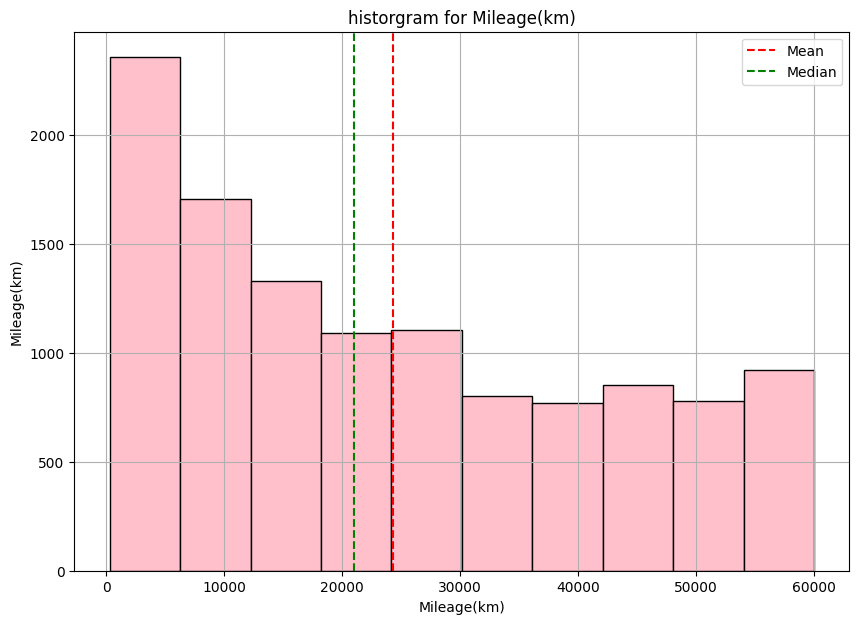

In [25]:
dataFile['Mileage(km)'].hist(figsize = (10, 7), color = 'pink', edgecolor = 'black' )
plt.axvline(x=dataFile['Mileage(km)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=dataFile['Mileage(km)'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.xlabel("Mileage(km)")
plt.ylabel("Mileage(km)")
plt.title("historgram for Mileage(km)")
print(dataFile['Mileage(km)'].describe()) # statistical description of numberical attributes
print( 'Mileage(km) skew', dataFile['Mileage(km)'].skew())
print( 'Mileage(km) kurtosis', dataFile['Mileage(km)'].kurtosis())

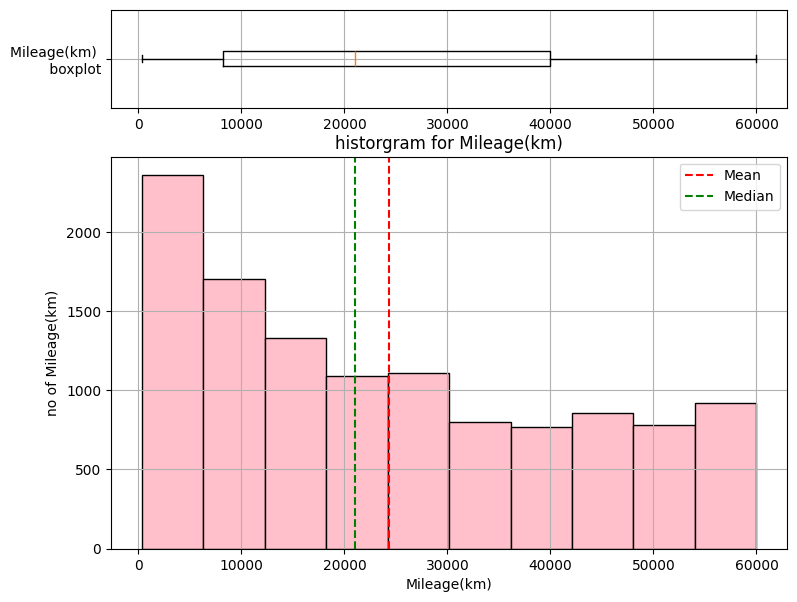

In [26]:
fig, ((ax11,ax12),(ax21,ax22)) = plt.subplots (2,2, sharex=False,sharey=False, gridspec_kw={"height_ratios": (.2, .8),"width_ratios": (.2, .8)},figsize=(12, 7))
ax11.remove()
ax21.remove()
ax12.boxplot(dataFile['Mileage(km)'],labels=["Mileage(km) \n boxplot"],vert=0)
ax22.hist(dataFile['Mileage(km)'], color = 'pink', edgecolor = 'black' )
plt.axvline(x=dataFile['Mileage(km)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=dataFile['Mileage(km)'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.xlabel("Mileage(km)")
plt.ylabel("no of Mileage(km)")
plt.title("historgram for Mileage(km)")
ax12.yaxis.grid(True)
ax12.xaxis.grid(True)
ax22.yaxis.grid(True)
ax22.xaxis.grid(True)
plt.show()

## 4.5 Understanding "EngineCapacity(cc)" continous variable

In [27]:
print(dataFile['EngineCapacity(cc)'].nunique())


48


In [28]:
dataFile['EngineCapacity(cc)'].value_counts(ascending=True)

EngineCapacity(cc)
4500       1
1498       1
2100       1
3799       1
6000       1
4965       1
4163       1
1496       1
2607       1
3600       1
2184       1
1900       1
1998       1
5000       1
600        1
860        1
4700       2
5438       2
1100       2
3200       2
5500       3
2200       3
6200       4
3342       4
3400       4
5700       4
4400       4
2600       9
4200       9
3300      10
4000      11
1198      41
2400      57
3500      59
3000      73
2500      92
1400     103
1200     211
2700     224
1300     605
2800     664
1600     753
800      877
2000    1182
660     1243
1000    1409
1800    1680
1500    2351
Name: count, dtype: int64

In [29]:
dataFile['EngineCapacity(cc)'].value_counts().sort_index(ascending=True)


EngineCapacity(cc)
600        1
660     1243
800      877
860        1
1000    1409
1100       2
1198      41
1200     211
1300     605
1400     103
1496       1
1498       1
1500    2351
1600     753
1800    1680
1900       1
1998       1
2000    1182
2100       1
2184       1
2200       3
2400      57
2500      92
2600       9
2607       1
2700     224
2800     664
3000      73
3200       2
3300      10
3342       4
3400       4
3500      59
3600       1
3799       1
4000      11
4163       1
4200       9
4400       4
4500       1
4700       2
4965       1
5000       1
5438       2
5500       3
5700       4
6000       1
6200       4
Name: count, dtype: int64

count    11713.000000
mean      1525.587979
std        634.555560
min        600.000000
25%       1000.000000
50%       1500.000000
75%       1800.000000
max       6200.000000
Name: EngineCapacity(cc), dtype: float64
EngineCapacity(cc) skew 1.0759817817720172
EngineCapacity(cc) kurtosis 3.0212702910692375


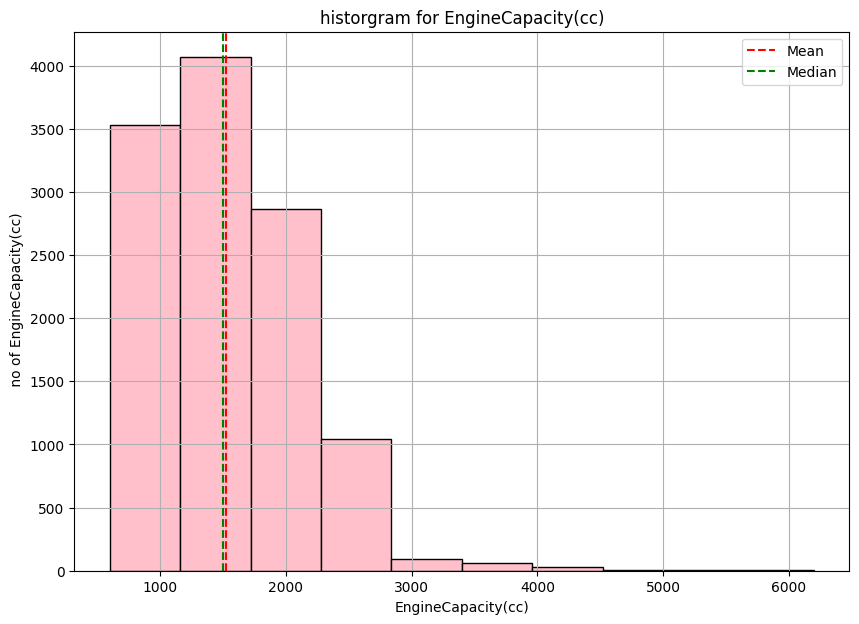

In [30]:
dataFile['EngineCapacity(cc)'].hist(figsize = (10, 7), color = 'pink', edgecolor = 'black' )
plt.axvline(x=dataFile['EngineCapacity(cc)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=dataFile['EngineCapacity(cc)'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.xlabel("EngineCapacity(cc)")
plt.ylabel(" no of EngineCapacity(cc)") 
plt.title("historgram for EngineCapacity(cc)")
print(dataFile['EngineCapacity(cc)'].describe()) # statistical description of numberical attributes
print( 'EngineCapacity(cc) skew', dataFile['EngineCapacity(cc)'].skew())
print( 'EngineCapacity(cc) kurtosis', dataFile['EngineCapacity(cc)'].kurtosis())

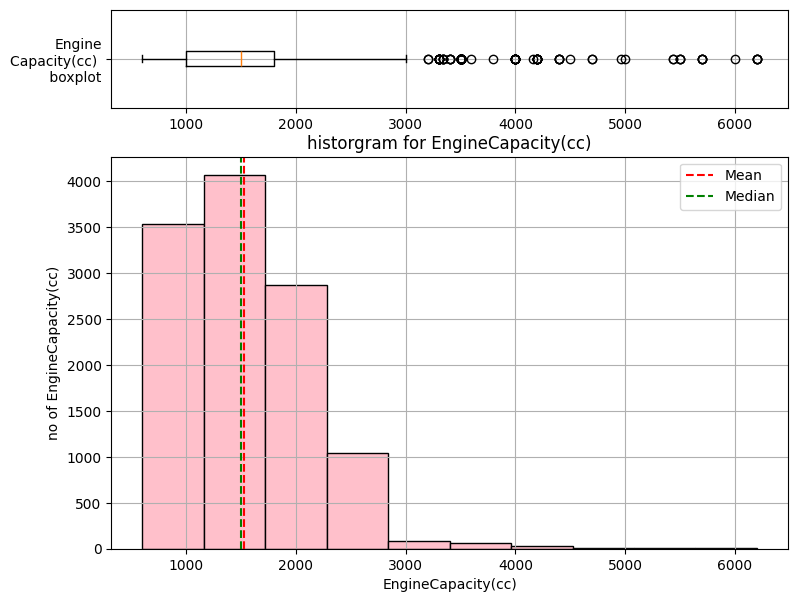

In [31]:
fig, ((ax11,ax12),(ax21,ax22)) = plt.subplots (2,2, sharex=False,sharey=False, gridspec_kw={"height_ratios": (.2, .8),"width_ratios": (.2, .8)},figsize=(12, 7))
ax11.remove()
ax21.remove()
ax12.boxplot(dataFile['EngineCapacity(cc)'],labels=["Engine\nCapacity(cc) \n boxplot"],vert=0)
ax22.hist(dataFile['EngineCapacity(cc)'], color = 'pink', edgecolor = 'black' )
plt.axvline(x=dataFile['EngineCapacity(cc)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=dataFile['EngineCapacity(cc)'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.xlabel("EngineCapacity(cc)")
plt.ylabel("no of EngineCapacity(cc)")
plt.title("historgram for EngineCapacity(cc)")
ax12.yaxis.grid(True)
ax12.xaxis.grid(True)
ax22.yaxis.grid(True)
ax22.xaxis.grid(True)
plt.show()

1. There are 61 different modelyear for which cars can be sold. 
2. lowest model year  is 1967 abd 

## 4.6 Histograms of all the continuous features

In [32]:
#Define a function to plot histograms

def histograms_plot(Data, features, rows, cols):
    fig=plt.figure(figsize=(15,8))
    for i, feature in enumerate(features):
       
        ax=fig.add_subplot(rows,cols,i+1)
        dataFile[feature].hist( ax=ax, color = 'pink', edgecolor = 'black' )
        ax.set_title(feature+"histograms")
        plt.axvline(x=dataFile[feature].mean(), color='red', linestyle='--', label='Mean')
        plt.axvline(x=dataFile[feature].median(), color='green', linestyle='--', label='Median')
        plt.legend()
        plt.xlabel(feature+' feature')
        plt.ylabel('# of count')

    fig.tight_layout()  
    plt.show()

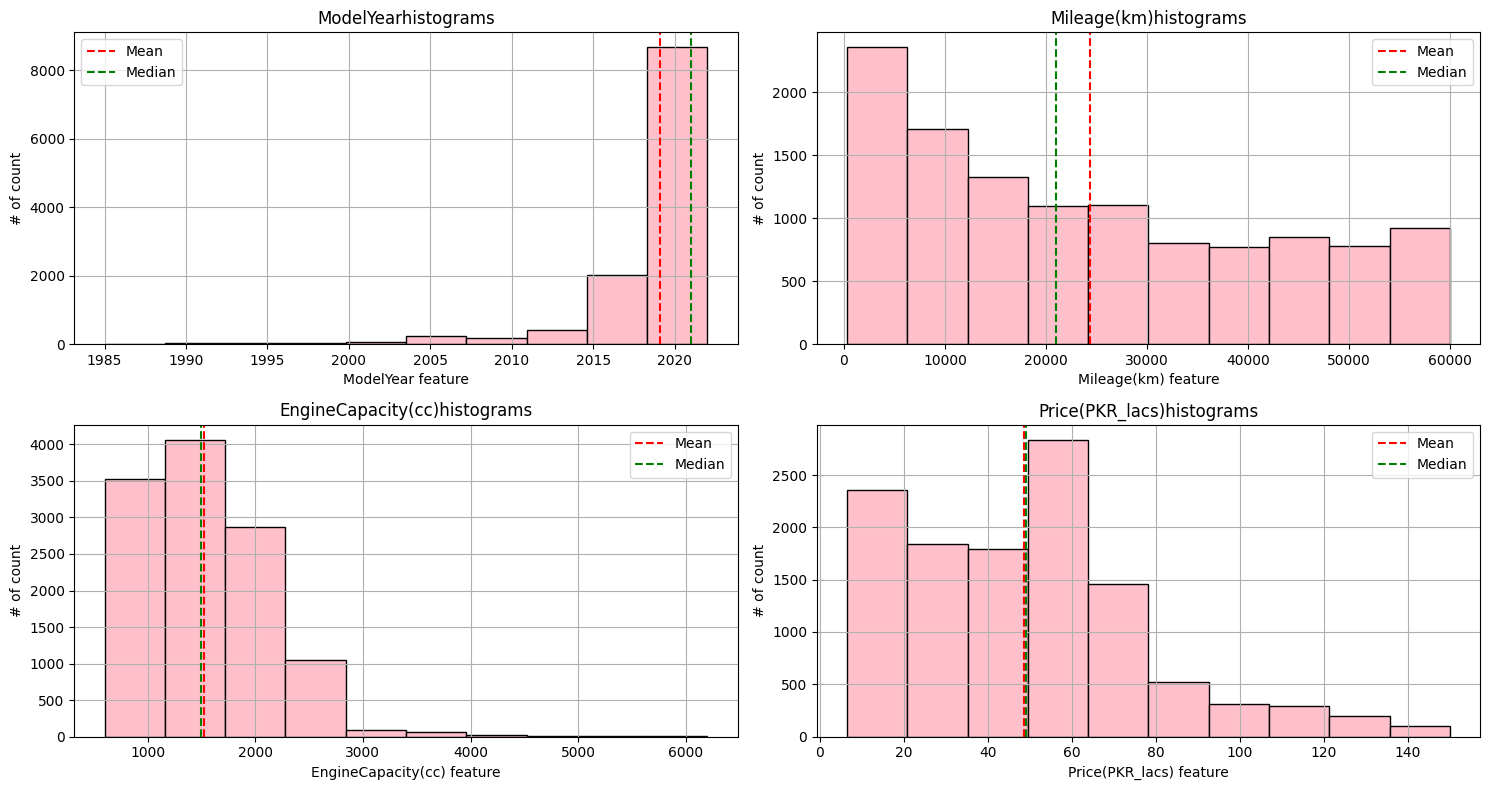

In [33]:
Continuous_features =[ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']
histograms_plot(dataFile, Continuous_features, 2,2)


### 5.6.1 Skewness of of all the continuous features Data

In [34]:
Continuous_features =[ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']

Num_variables = Continuous_features
for feature in Num_variables:
    print(feature, ':', dataFile[feature].skew())

ModelYear : -3.178150242744591
Mileage(km) : 0.4304066318317361
EngineCapacity(cc) : 1.0759817817720172
Price(PKR_lacs) : 0.8065567116693436


Thumb rules - 
1. If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
2. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
3. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

Here,
1. The skewness of Model year almost equal to -1, hence the data series of Model year is slightly negative skewed.
2. The skewness of Mileage is greater than 1, hence the data series of Mileage is extremely positive skewed.
3. The skewness of Engine Capacity is approximately 1, hence the data series of Engine Capacity is slightly positive skewed.
4. The skewness of Price is between 0.5 and 1, hence the data series of Price is slighly positive skewed.

### 5.6.2 Kurtosis of all the continuous features  data

In [35]:
Num_variables = Continuous_features
for feature in Num_variables:
    print(feature, ':', dataFile[feature].kurtosis())

ModelYear : 13.019607099279234
Mileage(km) : -1.0842849421972771
EngineCapacity(cc) : 3.0212702910692375
Price(PKR_lacs) : 0.6555074400883862


Thumb rules - 
1. if the kurtosis is greater than +2, the distribution is too peaked.
2. A kurtosis of less than −2 indicates a distribution that is too flat. 
3. When the kurtosis is close to zero, the pattern of responses is considered a normal distribution.

Here, 
1. The kurtosis of model year is close to 0 as compared to Mileage, Engine Capacity, hence the distribution is considered a normal distribution.
2. The kurtosis of Mileage of car is greater than +2, hence the distributions is too peaked.
3. The kurtosis of EngineCapacity is greater than +2, hence the distributions is too peaked.
4. The kurtosis of Price is very close to zero, hence the distribution is considered a normal distribution.

In [36]:
Continuous_features =[ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']

Correlation_variables = Continuous_features
for feature in Correlation_variables:
    print(feature)
    Correlation_Result = dataFile['Price(PKR_lacs)'].corr(dataFile[feature])
    print('Correlation between Price(PKR_lacs) and', feature, ':', Correlation_Result)

ModelYear
Correlation between Price(PKR_lacs) and ModelYear : 0.3464221717037544
Mileage(km)
Correlation between Price(PKR_lacs) and Mileage(km) : -0.21355904227633649
EngineCapacity(cc)
Correlation between Price(PKR_lacs) and EngineCapacity(cc) : 0.7930691926995553
Price(PKR_lacs)
Correlation between Price(PKR_lacs) and Price(PKR_lacs) : 1.0


1. Negative Correlation :

There is a negative correlation between Price(PKR_lacs) and Mileage. As one increases, other decreases.

2. Positive Correlation :

There is a positive correlation between Price(PKR_lacs) and ModelYear, EngineCapacity(cc). As one increases, other also increases.

## 4.7 scatter plot btwen all continous feature


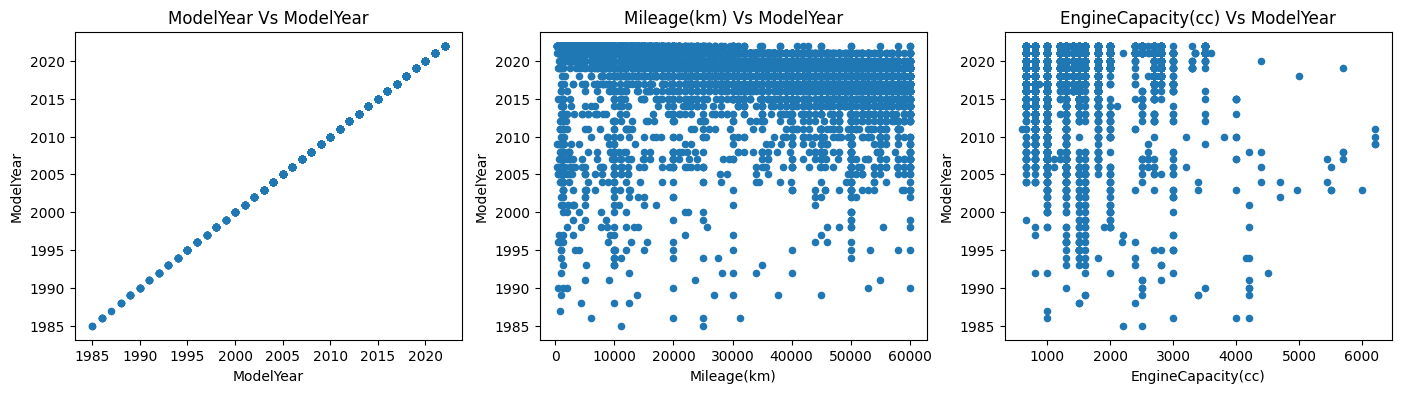

In [37]:
Continuous_features =['ModelYear', 'Mileage(km)','EngineCapacity(cc)']#,  'Price(PKR_lacs)']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    dataFile.plot.scatter(x = feature, y = 'ModelYear', title = feature + ' Vs ' + 'ModelYear', ax = axes[i])


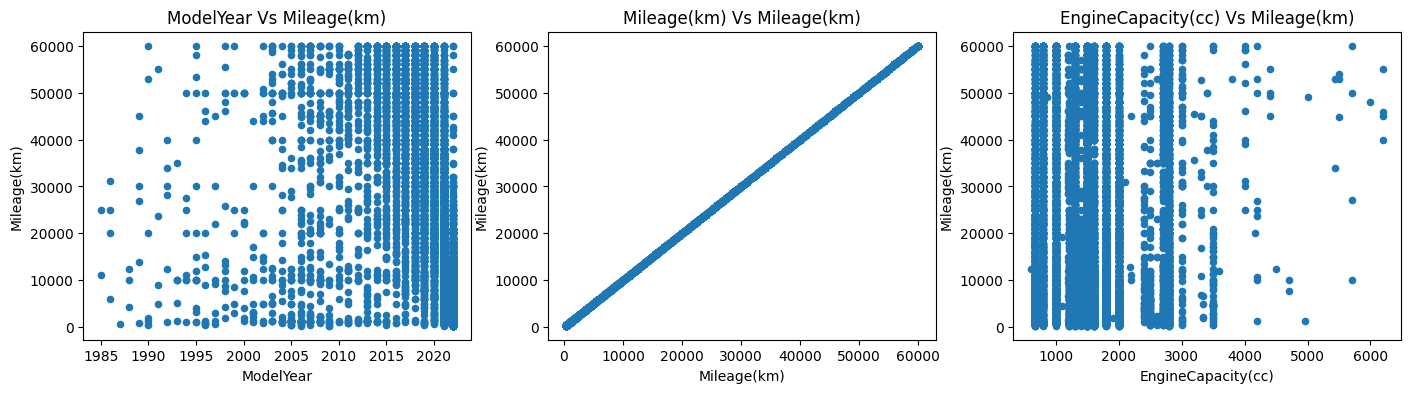

In [38]:
Continuous_features =['ModelYear', 'Mileage(km)','EngineCapacity(cc)']#,  'Price(PKR_lacs)']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    dataFile.plot.scatter(x = feature, y = 'Mileage(km)', title = feature + ' Vs ' + 'Mileage(km)', ax = axes[i])

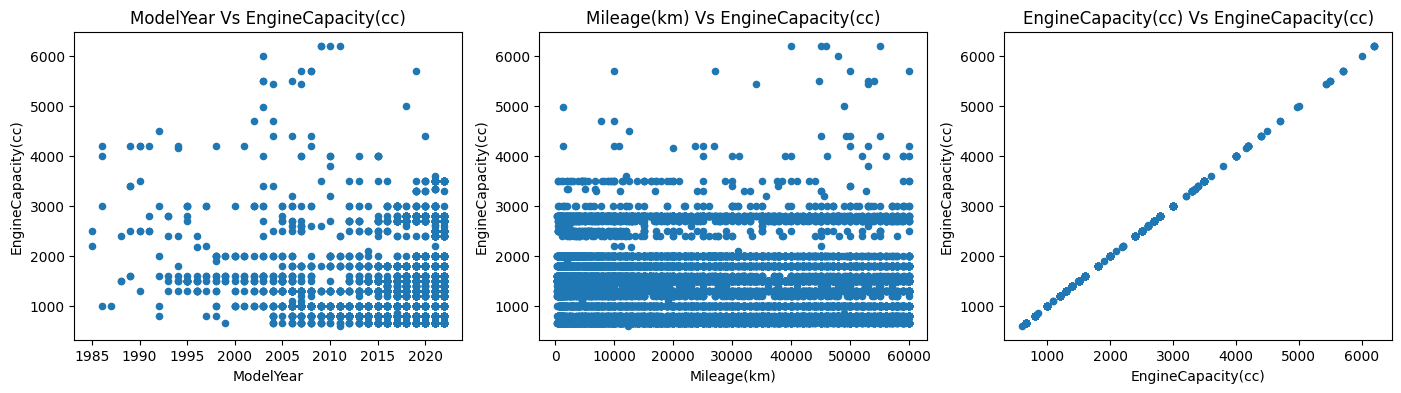

In [39]:
Continuous_features =['ModelYear', 'Mileage(km)','EngineCapacity(cc)']#,  'Price(PKR_lacs)']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    dataFile.plot.scatter(x = feature, y = 'EngineCapacity(cc)', title = feature + ' Vs ' + 'EngineCapacity(cc)', ax = axes[i])

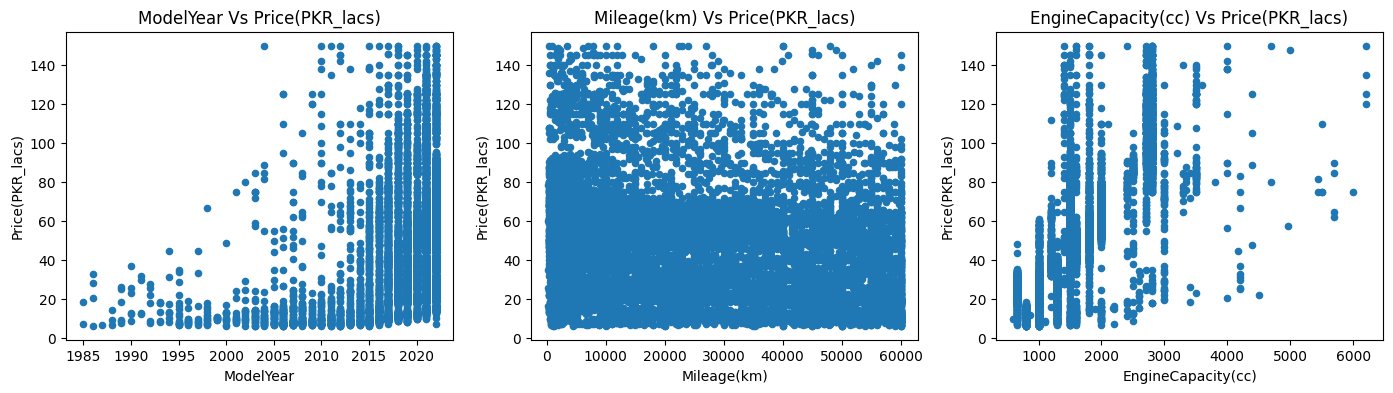

In [40]:
Continuous_features =[ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)']#,  'Price(PKR_lacs)']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    dataFile.plot.scatter(x = feature, y = 'Price(PKR_lacs)', title = feature + ' Vs ' + 'Price(PKR_lacs)', ax = axes[i])

## 4.8 Heatmap between all continous feature

                    ModelYear  Mileage(km)  EngineCapacity(cc)  \
ModelYear            1.000000    -0.328520            0.045987   
Mileage(km)         -0.328520     1.000000           -0.090632   
EngineCapacity(cc)   0.045987    -0.090632            1.000000   
Price(PKR_lacs)      0.346422    -0.213559            0.793069   

                    Price(PKR_lacs)  
ModelYear                  0.346422  
Mileage(km)               -0.213559  
EngineCapacity(cc)         0.793069  
Price(PKR_lacs)            1.000000  


Text(0.5, 1.0, 'Heatmap')

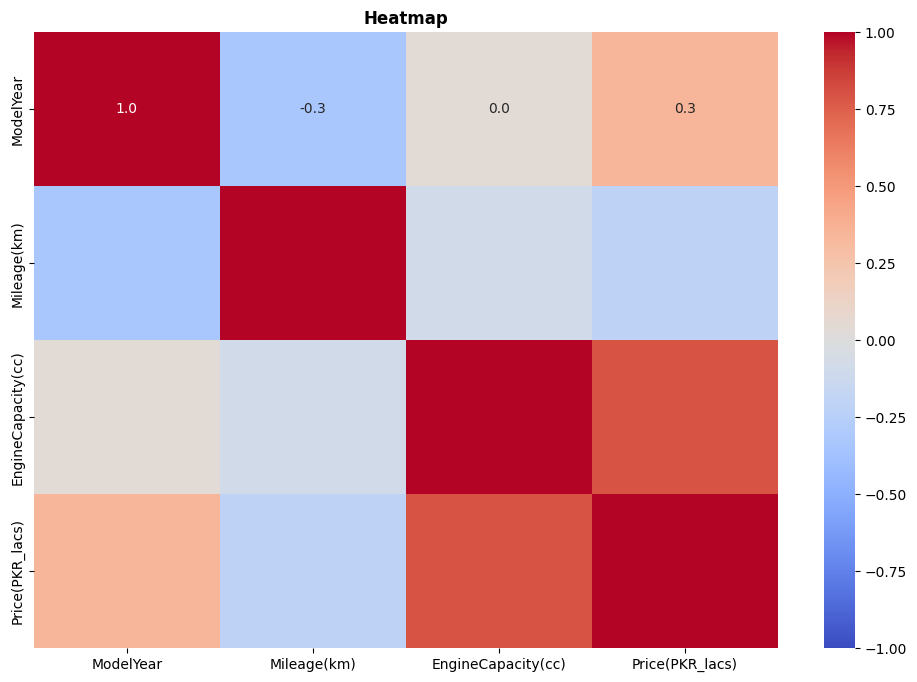

In [41]:
cols_Heatmap = [ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']
print(dataFile[cols_Heatmap].corr())
plt.figure(figsize = (12,8))
#create palette to show positive values in blue and negative values in red
#cmap=sns.diverging_palette(5, 260, as_cmap=True)
#plot heatmap
sns.heatmap(dataFile[cols_Heatmap].corr(), annot=True, fmt='0.1f',cmap="coolwarm", vmin=-1, vmax=1) #fmt='0.1f',cmap="coolwarm")
plt.title('Heatmap', fontweight='bold')

Interpretation of Pairplot and Heatmap -

High Positive Correlation is observed between:
1. Model Year - Price
2. Engine Capacity - Price
3. Engine Capacity - Mileage

High Negative Correlation is observed between:

1. Mileage - Model Year
2. Mileage - Engine Capacity
3. Mileage - Price


## 4.9 histrogram of  "CarCompany" categorical features

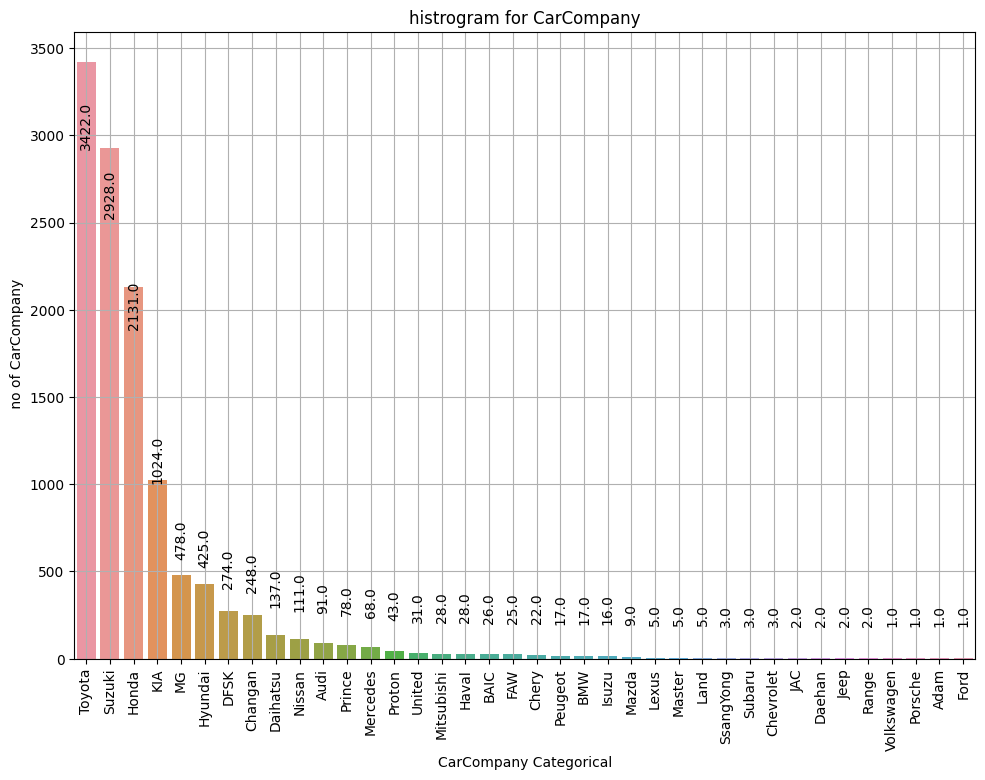

In [42]:
#  Categorical Data
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']

fig = plt.figure(figsize = (10, 7))

ax = sns.countplot(data = dataFile, x = 'CarCompany', order = dataFile['CarCompany'].value_counts().index)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / 6019)
    x1 = p.get_x() + p.get_width() / 2  # width of the plot
    y1 = p.get_y() + p.get_height()* 0.8
    ax.annotate(str(p.get_height()), (x1,y1+200), ha="center", rotation=90)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)     
    #print(p.get_height())
plt.tight_layout()
plt.xlabel("CarCompany Categorical")
plt.ylabel(" no of CarCompany") 
plt.title("histrogram for CarCompany")
plt.xticks(rotation=90) 
plt.show()

## 4.10 histrogram of  "EngineType" categorical features

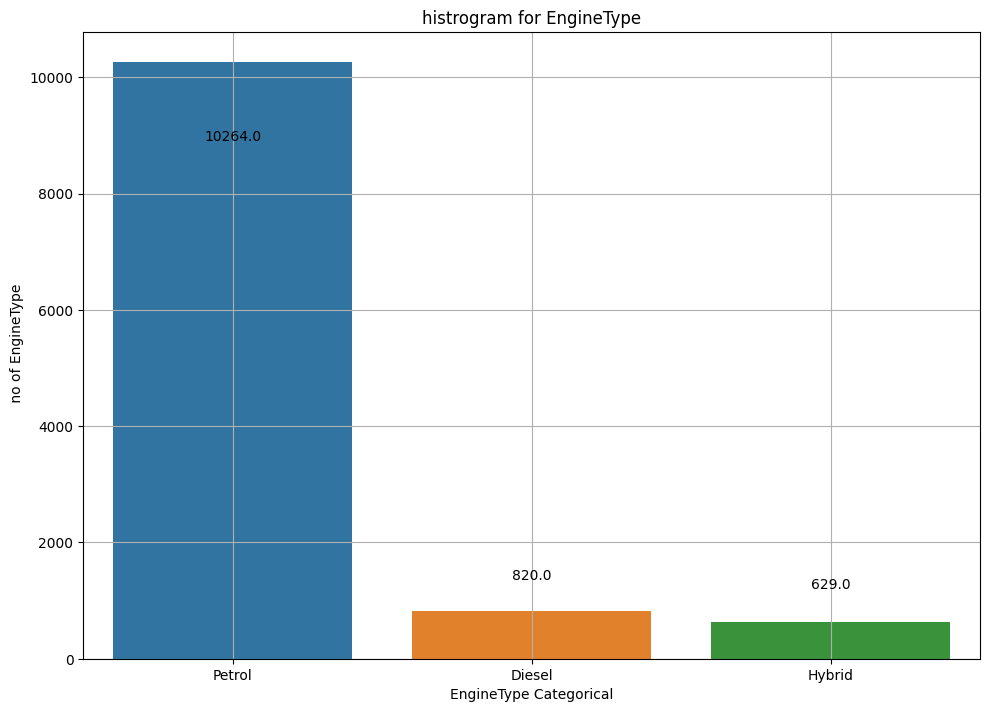

In [43]:
#  Categorical Data
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']

fig = plt.figure(figsize = (10, 7))

ax = sns.countplot(data = dataFile, x = 'EngineType', order = dataFile['EngineType'].value_counts().index)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / 6019)
    x1 = p.get_x() + p.get_width() / 2  # width of the plot
    y1 = p.get_y() + p.get_height()* 0.8
    ax.annotate(str(p.get_height()), (x1,y1+700), ha="center", rotation=0)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)     
    #print(p.get_height())
plt.tight_layout()
plt.xlabel("EngineType Categorical")
plt.ylabel(" no of EngineType") 
plt.title("histrogram for EngineType")
plt.xticks(rotation=0) 
plt.show()

## 4.11 histrogram of  "Transmission" categorical features

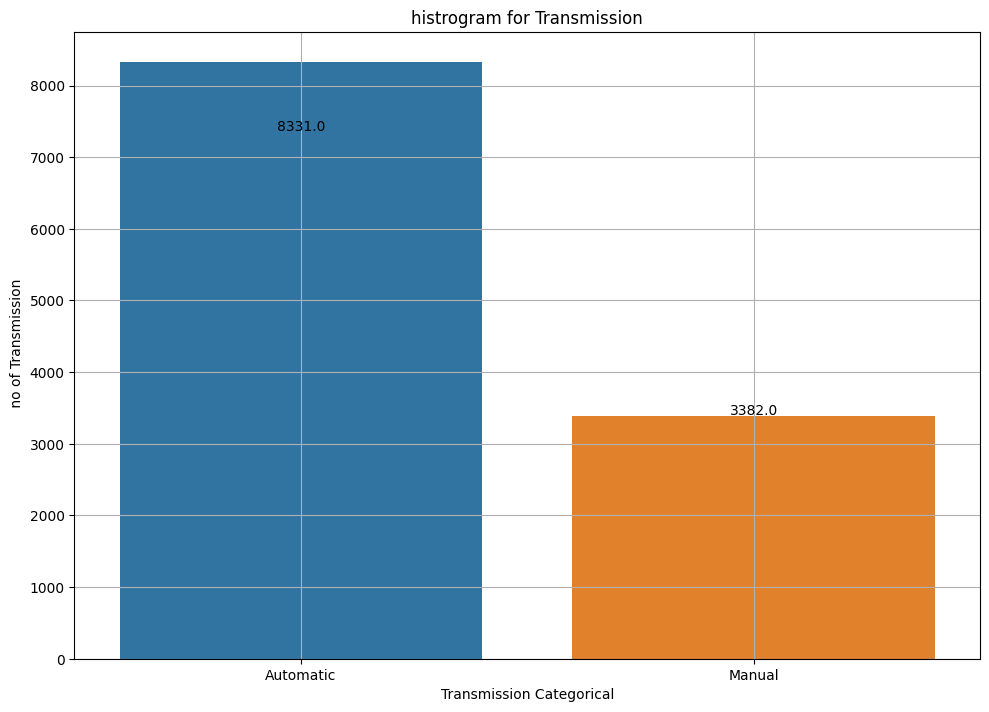

In [44]:
#  Categorical Data
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']

fig = plt.figure(figsize = (10, 7))

ax = sns.countplot(data = dataFile, x = 'Transmission', order = dataFile['Transmission'].value_counts().index)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / 6019)
    x1 = p.get_x() + p.get_width() / 2  # width of the plot
    y1 = p.get_y() + p.get_height()* 0.8
    ax.annotate(str(p.get_height()), (x1,y1+700), ha="center", rotation=0)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)     
    #print(p.get_height())
plt.tight_layout()
plt.xlabel("Transmission Categorical")
plt.ylabel(" no of Transmission") 
plt.title("histrogram for Transmission")
plt.xticks(rotation=0) 
plt.show()

## 4.12 histrogram of  "RegisteredCIty" categorical features

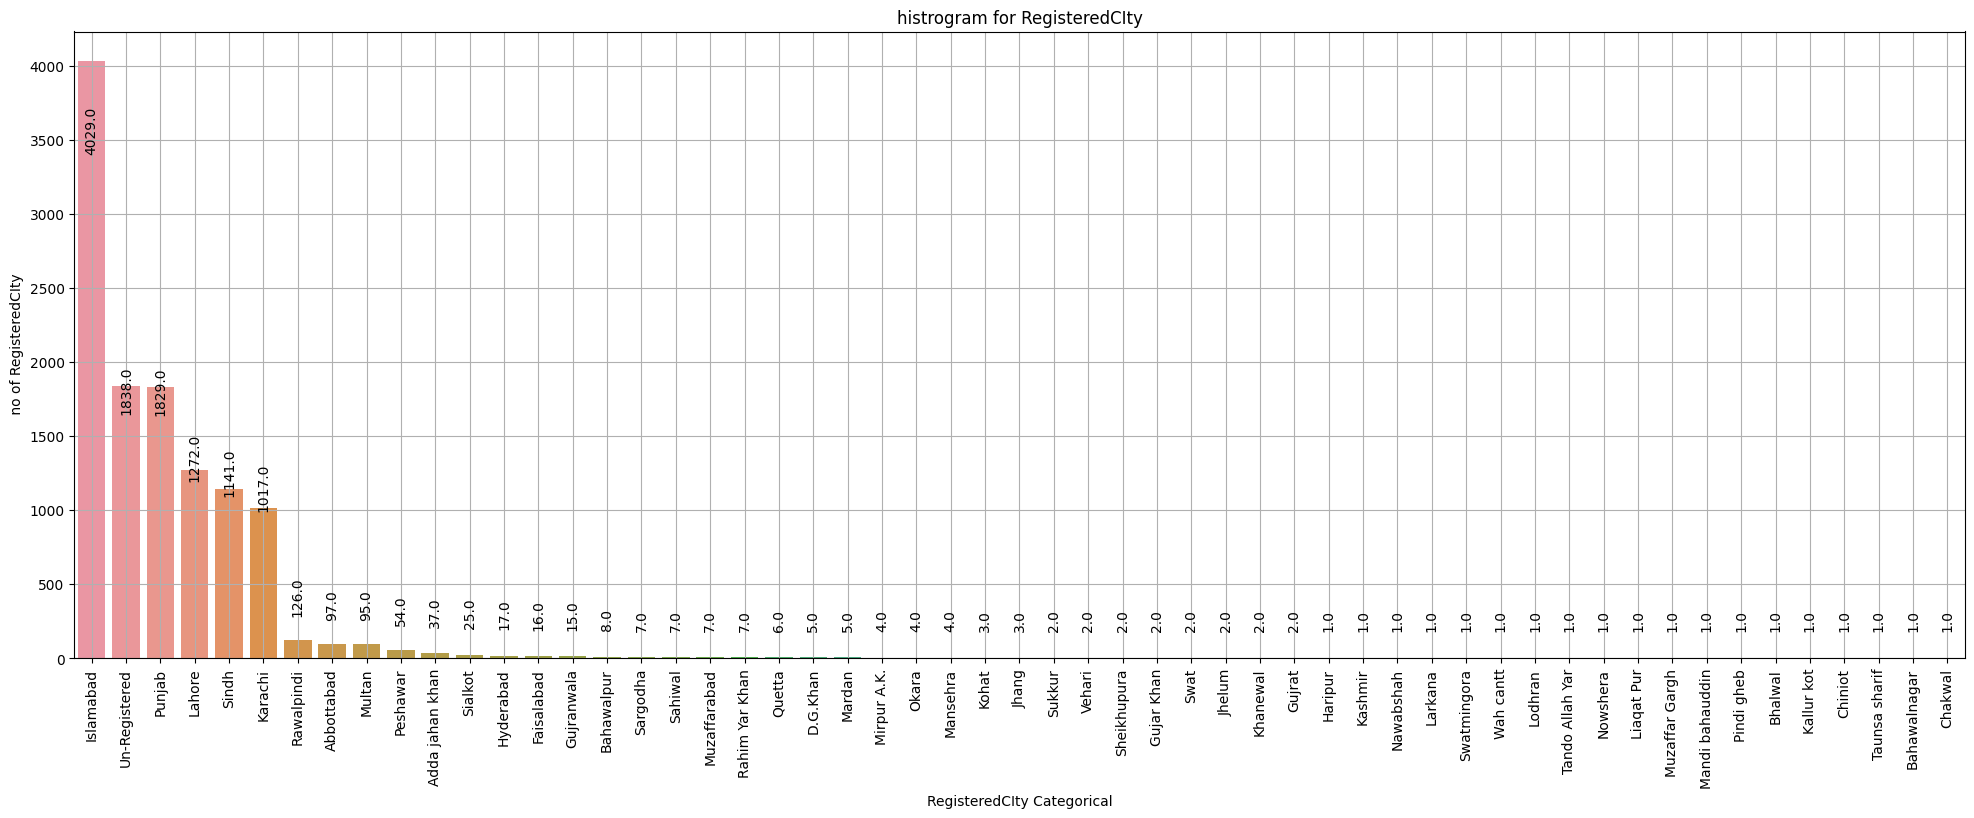

In [45]:
#  Categorical Data
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']

fig = plt.figure(figsize = (20, 7))

ax = sns.countplot(data = dataFile, x = 'RegisteredCIty', order = dataFile['RegisteredCIty'].value_counts().index)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / 6019)
    x1 = p.get_x() + p.get_width() / 2  # width of the plot
    y1 = p.get_y() + p.get_height()* 0.8
    ax.annotate(str(p.get_height()), (x1,y1+200), ha="center", rotation=90)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)     
    #print(p.get_height())
plt.tight_layout()
plt.xlabel("RegisteredCIty Categorical")
plt.ylabel(" no of RegisteredCIty") 
plt.title("histrogram for RegisteredCIty")
plt.xticks(rotation=90) 
plt.show()

## 4.13 histrogram of  "CarColor" categorical features

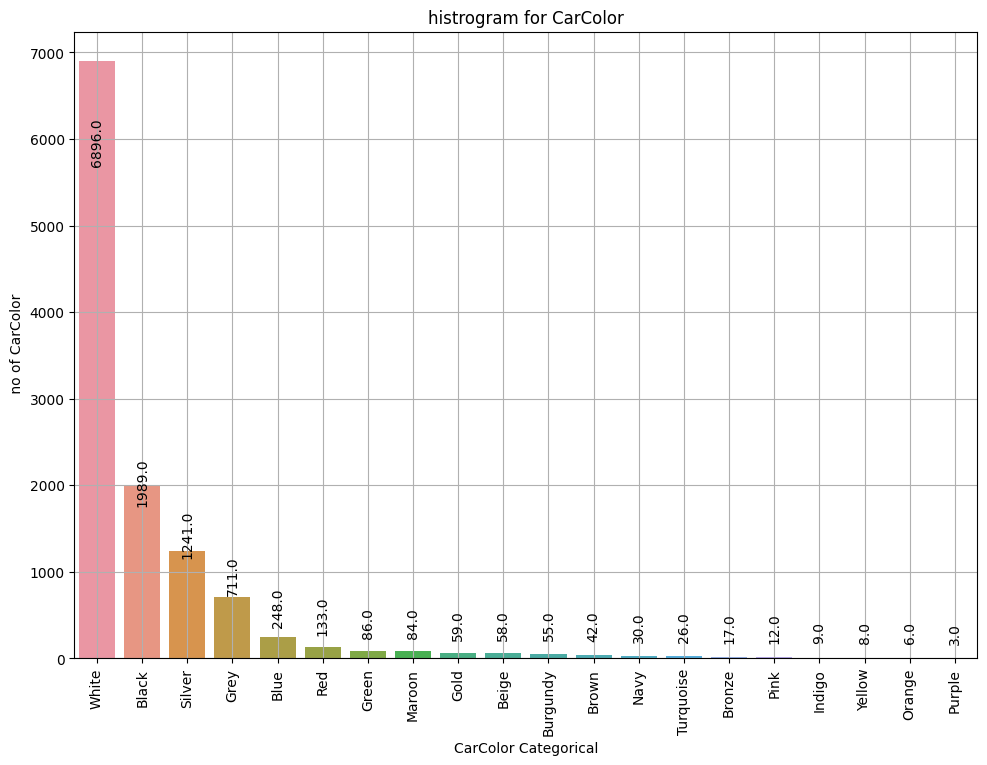

In [46]:
#  Categorical Data
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']

fig = plt.figure(figsize = (10, 7))

ax = sns.countplot(data = dataFile, x = 'CarColor', order = dataFile['CarColor'].value_counts().index)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / 6019)
    x1 = p.get_x() + p.get_width() / 2  # width of the plot
    y1 = p.get_y() + p.get_height()* 0.8
    ax.annotate(str(p.get_height()), (x1,y1+200), ha="center", rotation=90)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)     
    #print(p.get_height())
plt.tight_layout()
plt.xlabel("CarColor Categorical")
plt.ylabel(" no of CarColor") 
plt.title("histrogram for CarColor")
plt.xticks(rotation=90) 
plt.show()

## 4.14 histrogram of  "BodyType" categorical features

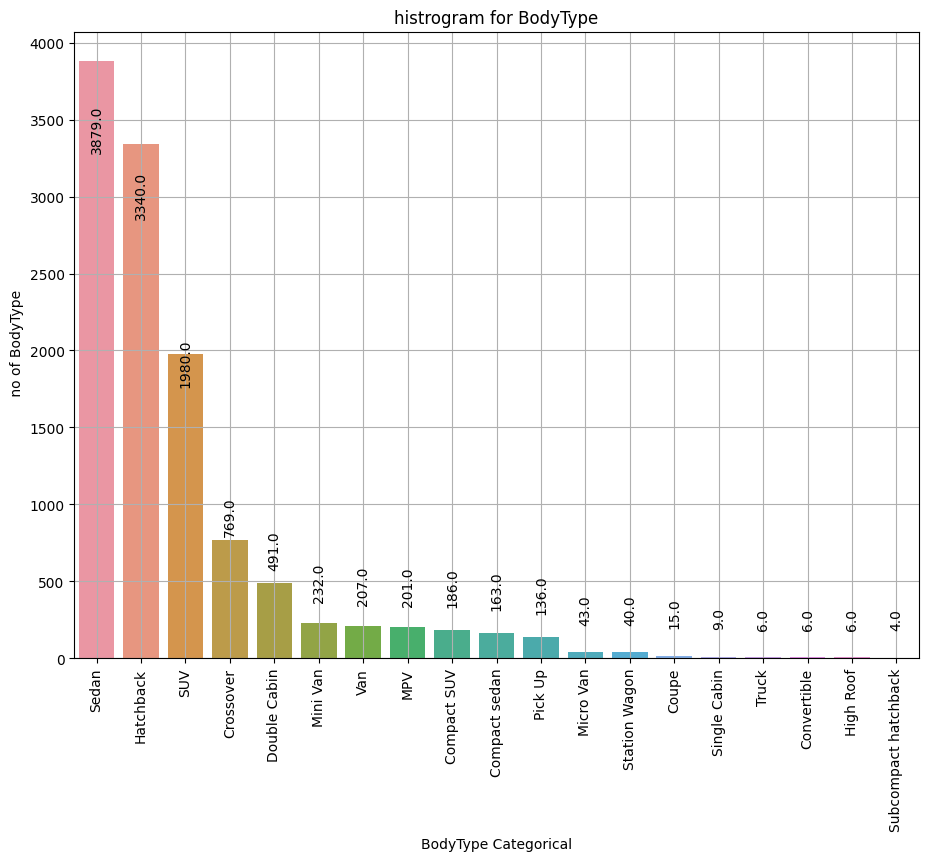

In [47]:
#  Categorical Data
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']

fig = plt.figure(figsize = (10, 7))

ax = sns.countplot(data = dataFile, x = 'BodyType', order = dataFile['BodyType'].value_counts().index)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / 6019)
    x1 = p.get_x() + p.get_width() / 2  # width of the plot
    y1 = p.get_y() + p.get_height()* 0.8
    ax.annotate(str(p.get_height()), (x1,y1+200), ha="center", rotation=90)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)     
    #print(p.get_height())
plt.tight_layout()
plt.xlabel("BodyType Categorical")
plt.ylabel(" no of BodyType") 
plt.title("histrogram for BodyType")
plt.xticks(rotation=90) 
plt.show()

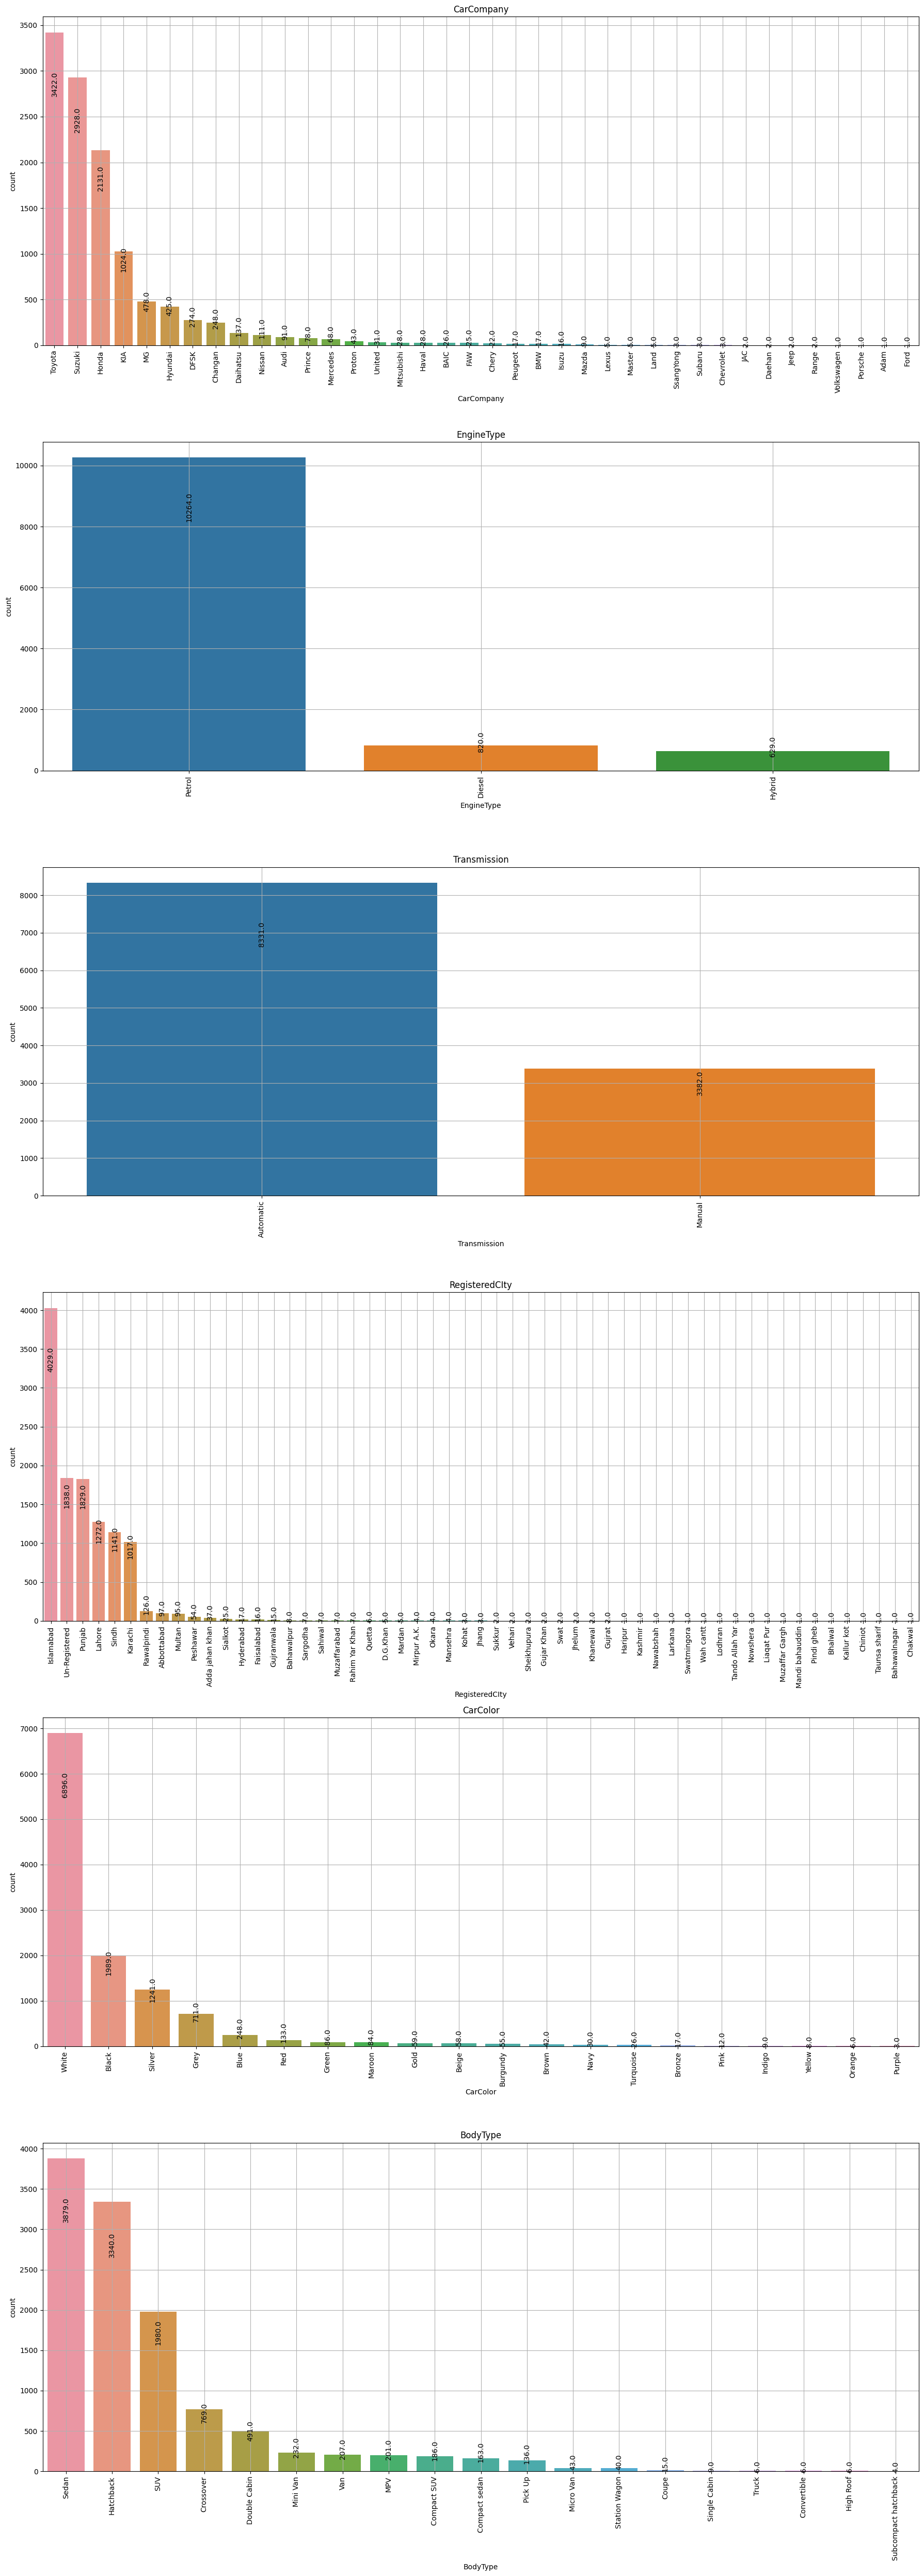

In [48]:
#  Categorical Data
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']

#  Categorical Data
a = 6 # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (18, 50))

for i in Categorical_features:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.xticks(rotation=90) 
    ax = sns.countplot(data = dataFile, x = i, order = dataFile[i].value_counts().index)
    c = c + 1
    for p in ax.patches:
        #x = p.get_x()* 1.005
        #y = p.get_height() * 1.005
        # ax.annotate(str(p.get_height()), (x,y))

        percentage = "{:.1f}%".format(100 * p.get_height() / 6019)
        x1 = p.get_x() + p.get_width() / 2  # width of the plot
        y1 = p.get_y() + p.get_height()* 0.8
        #ax.annotate(percentage, (x1, y1),ha="center", rotation=90)
        ax.annotate(str(p.get_height()), (x1,y1),ha="center", rotation=90)

        ax.yaxis.grid(True)
        ax.xaxis.grid(True)
        
plt.tight_layout()
plt.show()

1. Highest number of cars are available in _________ for selling. The lowest sale happened in ________. 
2. The maximum cars being sold are ________ cars.
3. Most of the cars to be sold are ________ operated.
6. __________ is the top most selling brand where as _______ is the lowest selling brand.


##  4.8 Understanding Price relationship with all Categorical variables

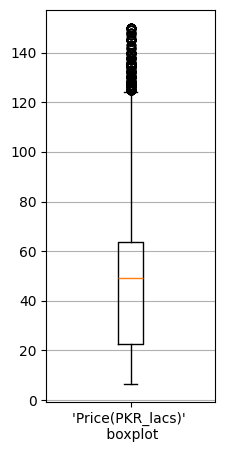

In [49]:
fig, ((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2, sharex=False,sharey=False, gridspec_kw={"height_ratios": (.2, .8),"width_ratios": (.2, .8)},figsize=(12, 7))
ax11.remove() 
ax12.remove()
ax22.remove()
ax21.boxplot(dataFile['Price(PKR_lacs)'],labels=["'Price(PKR_lacs)' \n boxplot"],vert=1)
ax21.yaxis.grid(True)
ax.xaxis.grid(True)

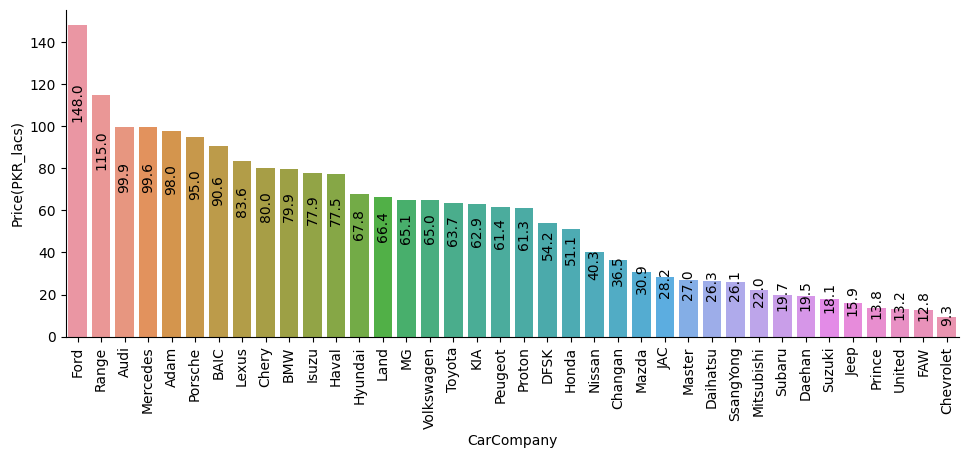

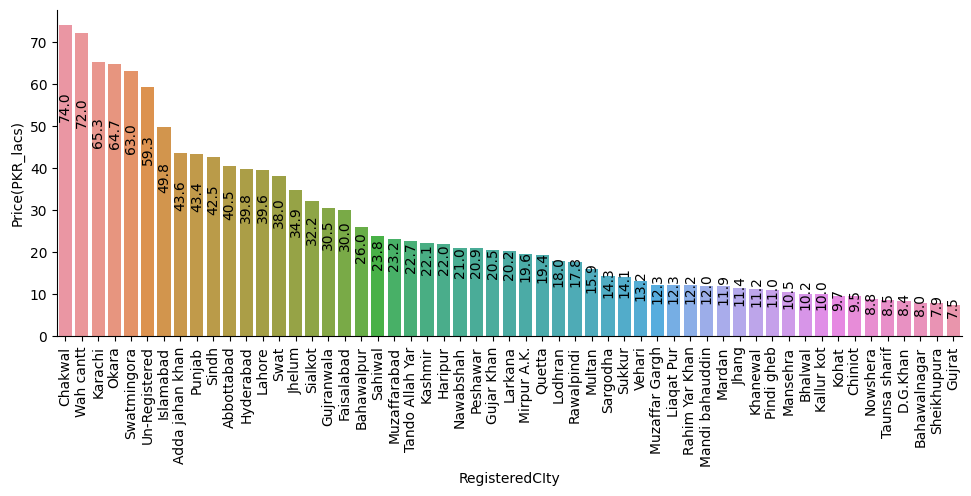

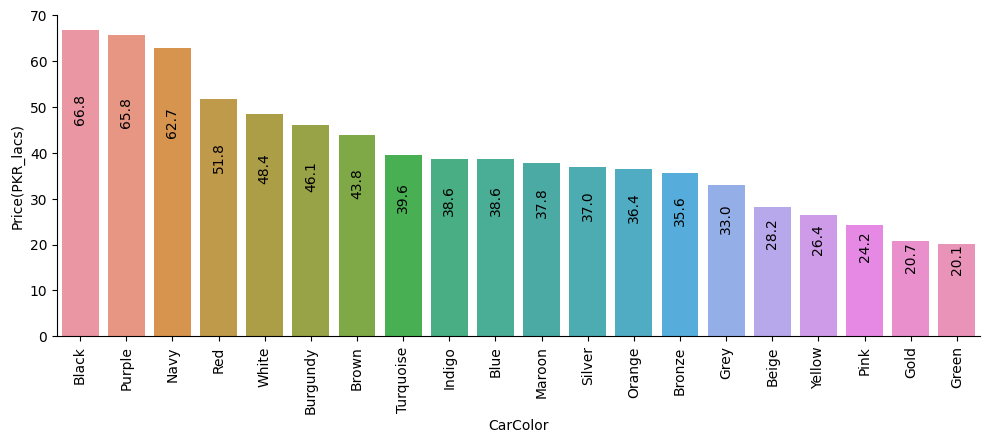

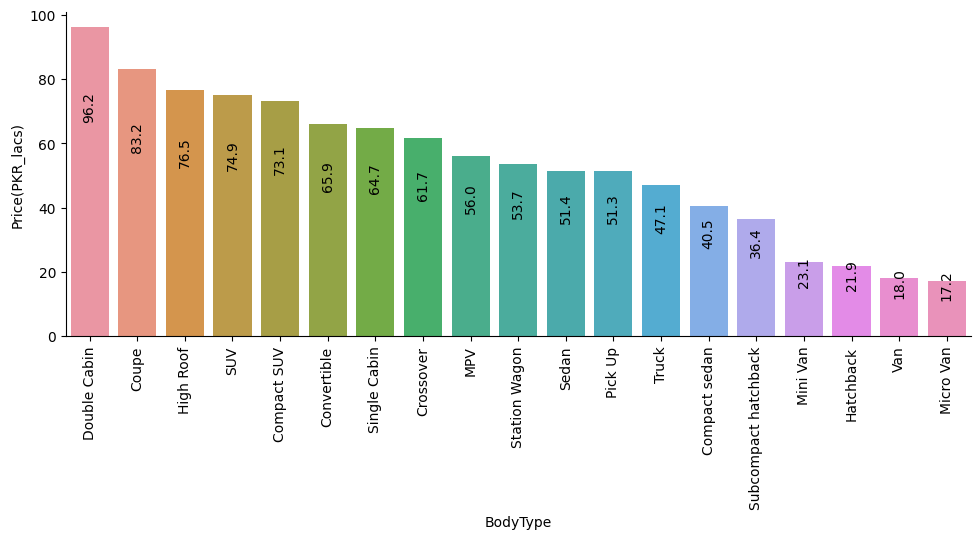

In [50]:
Categorical_features = ['CarCompany', 'RegisteredCIty', 'CarColor', 'BodyType']
for feature in Categorical_features:
    order=dataFile.groupby([feature])['Price(PKR_lacs)'].mean().sort_values(ascending= False).index
    plot=sns.catplot(x=feature, y="Price(PKR_lacs)", data=dataFile,kind='bar', 
                     order = order, height=4, aspect=2.5,ci=None, ax=ax22 )
    #plot.set(title=feature + ' Vs ' + 'Price(PKR_lacs)')

    plt.xticks(rotation=90)
    
    ax = plot.facet_axis(0,0)
    for p in ax.patches:
        ax.text((p.get_x() + p.get_width() / 2), 
            (p.get_height() * 0.7), 
           '{0:.1f}'.format(p.get_height()), ha="center", rotation=90)
    

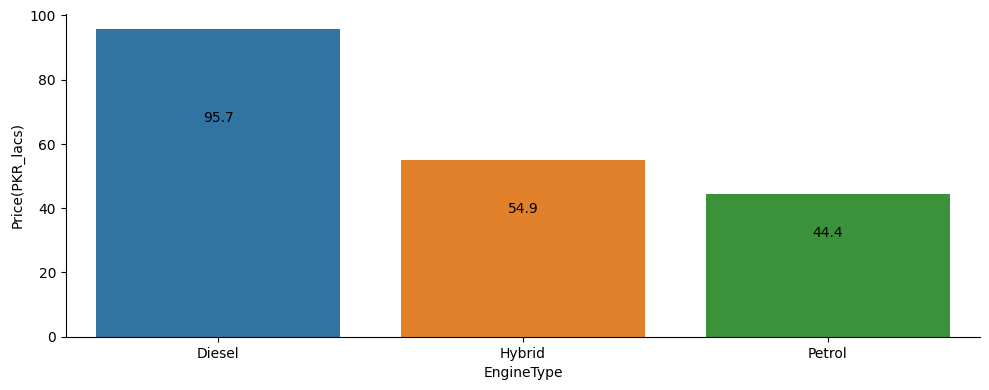

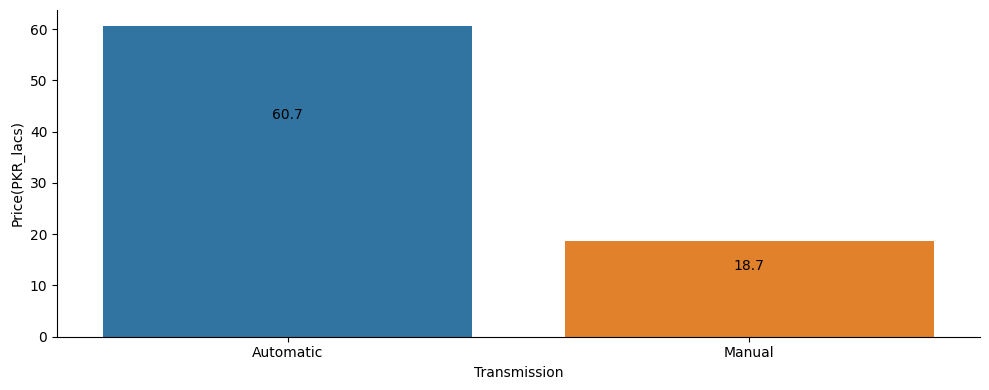

In [51]:
Categorical_features = ['EngineType', 'Transmission']
for feature in Categorical_features:
    order=dataFile.groupby([feature])['Price(PKR_lacs)'].mean().sort_values(ascending= False).index
    plot=sns.catplot(x=feature, y="Price(PKR_lacs)", data=dataFile,kind='bar', 
                     order = order, height=4, aspect=2.5,ci=None, ax=ax22 )
    #plot.set(title=feature + ' Vs ' + 'Price(PKR_lacs)')

    plt.xticks(rotation=0)
    ax = plot.facet_axis(0,0)
    for p in ax.patches:
        ax.text((p.get_x() + p.get_width() / 2), 
            (p.get_height() * 0.7), 
           '{0:.1f}'.format(p.get_height()), ha="center", rotation=0)
    